<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
import math as mt
import numpy as np

In [ ]:
N = 5
x = 1
sumatoria = 0
for i in range(0,N):
  signo = ((-1)**i)
  suma = (signo)*((x**i)/(mt.factorial(i)))
  sumatoria += suma
  print(i,suma,sumatoria)

0 1.0 1.0
1 -1.0 0.0
2 0.5 0.5
3 -0.16666666666666666 0.33333333333333337
4 0.041666666666666664 0.37500000000000006


In [ ]:
def serie_e1(x,n):
  sumatoria = 0
  for i in range(0,n):
    signo = ((-1)**i)
    suma = (signo)*((x**i)/(mt.factorial(i)))
    sumatoria += suma

  return(sumatoria)
e1 = serie_e1(10,100)
e1

4.5399929433607724e-05

In [ ]:
def serie_e2(x,n):
  sumatoria = 0
  for i in range(0,n):
    suma = ((x**i)/(mt.factorial(i)))
    sumatoria += suma

  return(1/sumatoria)
e2 = serie_e2(10,100)
e2

4.539992976248486e-05

In [ ]:
x=10
e_exa = np.exp(-x)
e_exa

4.5399929762484854e-05

In [ ]:
x= 0.5
N = 100
termino_m = abs((-x**(N+1))/(mt.factorial(N+1)))
termino_m

4.1845177021994206e-191

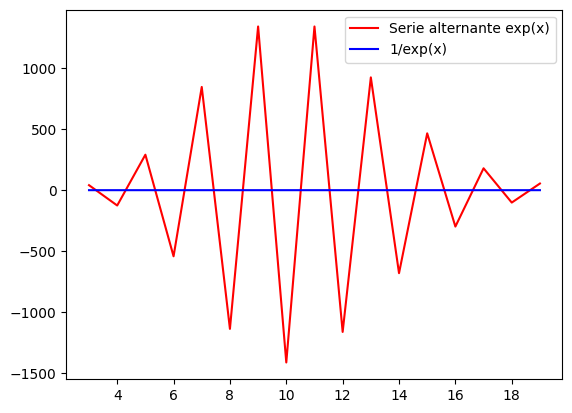

In [ ]:
N = 100
x = 10
N = np.arange(3, 20, 1)
exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))

for i,n in  enumerate(N):
  exp1_[i] =  serie_e1(x = x, n = n)
  exp2_[i] =  serie_e2(x = x, n = n)


plt.figure()
plt.plot(N, exp1_,"r-", label="Serie alternante exp(x)"   )
plt.plot(N, exp2_,"b-",label="1/exp(x)"   )
plt.legend()
plt.show()

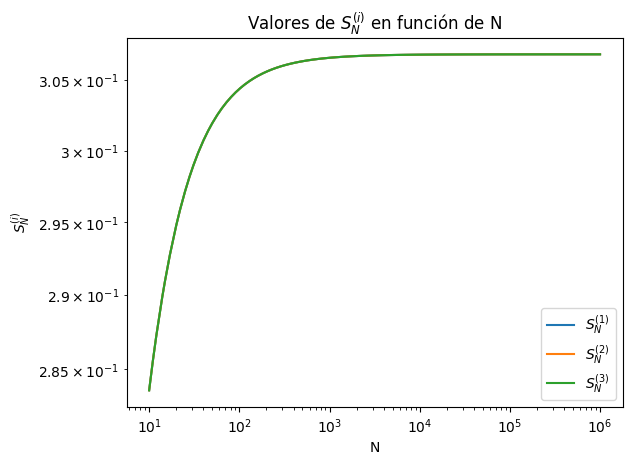

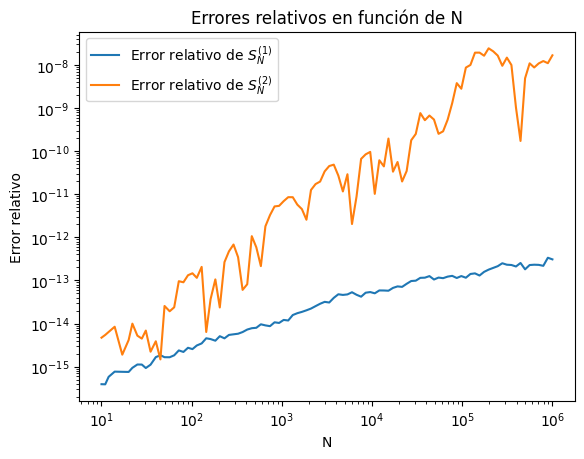

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def S_N_1(N):
  suma = 0
  for n in range(1, 2*N+1):
    suma += (-1)**n * n / (n+1)
  return suma

def S_N_2(N):
  suma1 = 0
  suma2 = 0
  for n in range(1, N+1):
    suma1 += -(2*n-1) / (2*n)
    suma2 += 2*n / (2*n+1)
  return suma1 + suma2

def S_N_3(N):
  suma = 0
  for n in range(1, N+1):
    suma += 1 / (2*n*(2*n+1))
  return suma

def error_relativo(S_N_i, S_N_3):
  return abs((S_N_i - S_N_3) / S_N_3)

N = np.logspace(1, 6, num=100, dtype=int)

S_N_1_list = []
S_N_2_list = []
S_N_3_list = []
error_S_N_1_list = []
error_S_N_2_list = []

# Calcular los valores de S_N^(i) y los errores relativos para cada valor de N
for n in N:
  S_N_1_value = S_N_1(n)
  S_N_2_value = S_N_2(n)
  S_N_3_value = S_N_3(n)
  error_S_N_1_value = error_relativo(S_N_1_value, S_N_3_value)
  error_S_N_2_value = error_relativo(S_N_2_value, S_N_3_value)

  S_N_1_list.append(S_N_1_value)
  S_N_2_list.append(S_N_2_value)
  S_N_3_list.append(S_N_3_value)
  error_S_N_1_list.append(error_S_N_1_value)
  error_S_N_2_list.append(error_S_N_2_value)

# Graficar los valores de S_N^(i) en función de N en escala log-log
plt.figure()
plt.loglog(N, S_N_1_list, label='$S_N^{(1)}$')
plt.loglog(N, S_N_2_list, label='$S_N^{(2)}$')
plt.loglog(N, S_N_3_list, label='$S_N^{(3)}$')
plt.xlabel("N")
plt.ylabel("$S_N^{(i)}$")
plt.legend()
plt.title("Valores de $S_N^{(i)}$ en función de N")
plt.show()

# Graficar los errores relativos en función de N en escala log-log
plt.figure()
plt.loglog(N, error_S_N_1_list, label="Error relativo de $S_N^{(1)}$")
plt.loglog(N, error_S_N_2_list, label="Error relativo de $S_N^{(2)}$")
plt.xlabel("N")
plt.ylabel("Error relativo")
plt.legend()
plt.title("Errores relativos en función de N")
plt.show()
